In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

#### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


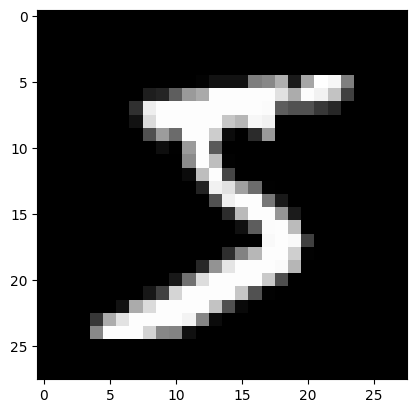

In [3]:
plt.imshow(x_train[0],cmap ='gray')

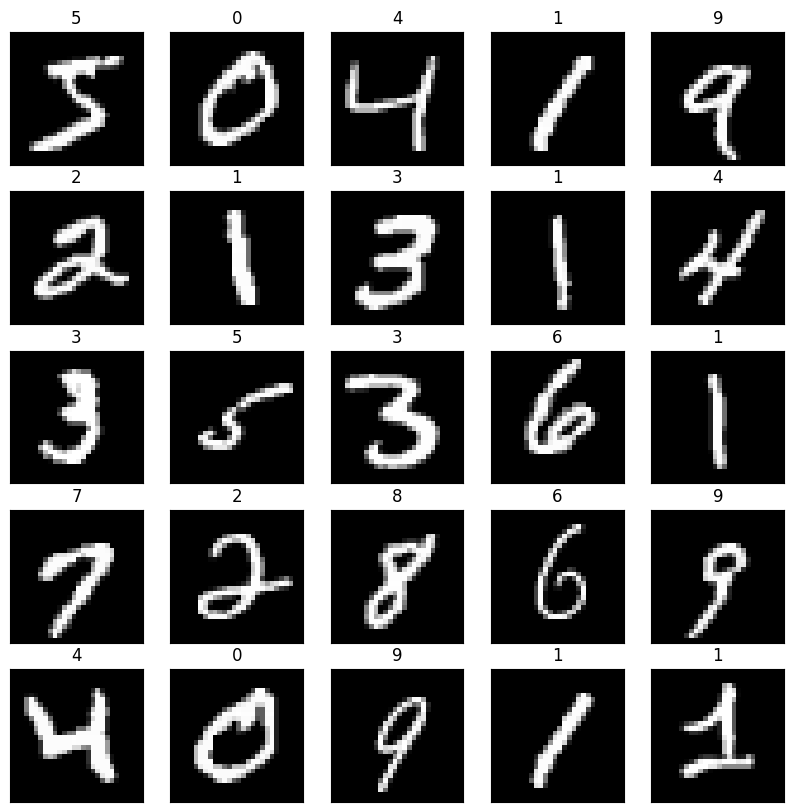

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

#### Scale the data

In [5]:
x_train = x_train / 255
x_test = x_test / 255

#### Flatten the data

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0].size

784

In [8]:
size = x_train[0].size
size

784

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
x_train = x_train.reshape((-1, size))
x_test = x_test.reshape((-1, size))

In [11]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Prepare output variable

In [12]:
y_train.shape

(60000,)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape

(60000, 10)

Build the model

In [15]:
model = Sequential()

model.add(Dense(size, input_shape = (size,), activation='relu'))

model.add(Dense(128 , activation='relu'))

model.add(Dense(10 , activation='softmax'))

Compile the model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [17]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 29s 4ms/step - loss: 0.1839 - accuracy: 0.9442
Epoch 2/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0887 - accuracy: 0.9724
Epoch 3/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0658 - accuracy: 0.9802
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0511 - accuracy: 0.9841
Epoch 5/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0439 - accuracy: 0.9868
Epoch 6/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0388 - accuracy: 0.9884
Epoch 7/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0348 - accuracy: 0.9901
Epoch 8/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0287 - accuracy: 0.9917
Epoch 9/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0286 - accuracy: 0.9923
Epoch 10/10
6000/6000 [==============================] - 20s 3ms/step - l

Evalate on test data

In [19]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 [==============================] - 27s 3ms/step - loss: 0.1572 - accuracy: 0.9795


[0.15721742808818817, 0.9794999957084656]

In [65]:
img = x_test[578]

In [29]:
img.shape

(784,)

In [66]:
img = img.reshape(28,28)

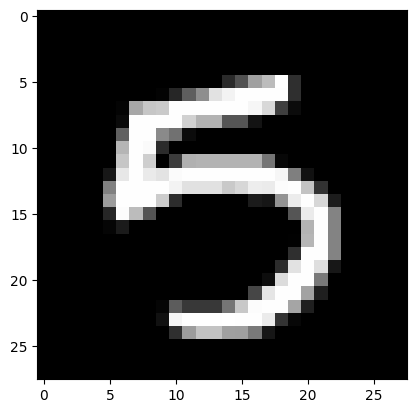

In [48]:
plt.imshow(img.reshape(28,28), cmap = 'gray')

In [62]:
def predict(image):
  # image = image / 255
  image = image.reshape(1, size)
  prediction = model.predict(image)
  return np.argmax(prediction)

In [53]:
img.shape

(784,)

In [67]:
predict(img)

1/1 [==============================] - 0s 17ms/step


3

In [64]:
img = x_test[600]
img = img.reshape(28,28)
predict(img)

1/1 [==============================] - 0s 17ms/step


6

(784,)

In [5]:
# #### Normalize the data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# #### Reshape the data
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# #### Convert the labels to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# #### Create the model
model1 = Sequential()
model1.add(Dense(units=512, activation='relu', input_dim=784))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=10, activation='softmax'))

# #### Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# #### Train the model
model1.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 15s 28ms/step - loss: 0.2242 - accuracy: 0.9335
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0829 - accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0532 - accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0169 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0159 - accuracy: 0.9943
Epoch 9/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0110 - a

In [ ]:
# #### Evaluate the model
model1.evaluate(x_test, y_test)